## DataFrame Methods for Data Analysis
1. Arithmetic & boolean operations with scalars operates element-wise
2. Numpy universal functions operate element-wise as they do with arrays
3. DataFrame applymap & apply - apply any arbitrary function to a DataFrame
4. DataFrames have many built in methods similar to numpy arrays
5. Correlation/Covariance

In [1]:
import pandas as pd
import numpy as np

index=['20201201','20201202','20201203','20201204']
columns = ['AAPL','MSFT','TSLA','LULU']

data=[[-0.01,0.03,0.05,0.005],
      [0.015,0.005,-0.05,-0.0025],
      [-0.025,0.0015,-0.02,0.01],
      [-0.03,0.015,0.03,0.01]]

df=pd.DataFrame(data,index=index,columns=columns)
df

,AAPL,MSFT,TSLA,LULU
20201201,-0.010,0.0300,0.05,0.0050
20201202,0.015,0.0050,-0.05,-0.0025
20201203,-0.025,0.0015,-0.02,0.0100
20201204,-0.030,0.0150,0.03,0.0100


### Arithmetic & boolean operations

In [2]:
# Subtract Market Returns
mkt_ret=0.005
df - mkt_ret

,AAPL,MSFT,TSLA,LULU
20201201,-0.015,0.0250,0.045,0.0000
20201202,0.010,0.0000,-0.055,-0.0075
20201203,-0.030,-0.0035,-0.025,0.0050
20201204,-0.035,0.0100,0.025,0.0050


In [4]:
# boolean logic operates element-wise
df>0

,AAPL,MSFT,TSLA,LULU
20201201,False,True,True,True
20201202,True,True,False,False
20201203,False,True,False,True
20201204,False,True,True,True


### Numpy universal functions operate element-wise as they do with arrays

In [5]:
# Many NumPy functions work as expected elementwise
np.abs(df)

,AAPL,MSFT,TSLA,LULU
20201201,0.010,0.0300,0.05,0.0050
20201202,0.015,0.0050,0.05,0.0025
20201203,0.025,0.0015,0.02,0.0100
20201204,0.030,0.0150,0.03,0.0100


### DataFrame applymap & apply - apply any function to a DataFrame

In [6]:
def thresh(x):
    if np.abs(x) > 0.005:
        return x
    else:
        return 0

df.applymap(thresh)

/var/folders/4f/9230q1tn743gqfht8kjmqts40000gn/T/ipykernel_32040/2148073934.py:7: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df.applymap(thresh)


,AAPL,MSFT,TSLA,LULU
20201201,-0.010,0.030,0.05,0.00
20201202,0.015,0.000,-0.05,0.00
20201203,-0.025,0.000,-0.02,0.01
20201204,-0.030,0.015,0.03,0.01


In [7]:
df

,AAPL,MSFT,TSLA,LULU
20201201,-0.010,0.0300,0.05,0.0050
20201202,0.015,0.0050,-0.05,-0.0025
20201203,-0.025,0.0015,-0.02,0.0100
20201204,-0.030,0.0150,0.03,0.0100


In [8]:
def max_minus_min(ser):
    return ser.max()-ser.min()
max_minus_min(df['AAPL'])

0.045

In [9]:
df.apply(max_minus_min)

AAPL    0.0450
MSFT    0.0285
TSLA    0.1000
LULU    0.0125
dtype: float64

In [10]:
df.apply(max_minus_min,axis=1)

20201201    0.060
20201202    0.065
20201203    0.035
20201204    0.060
dtype: float64

In [11]:
def min_and_max(ser):
    return pd.Series([ser.min(),ser.max()],index=['min','max'])
df.apply(min_and_max)

,AAPL,MSFT,TSLA,LULU
min,-0.030,0.0015,-0.05,-0.0025
max,0.015,0.0300,0.05,0.0100


### DataFrames have many built in methods similar to numpy arrays

In [12]:
# average return for each stock
df.mean()

AAPL   -0.012500
MSFT    0.012875
TSLA    0.002500
LULU    0.005625
dtype: float64

In [13]:
# average return for each time
df.mean(axis=1)

20201201    0.018750
20201202   -0.008125
20201203   -0.008375
20201204    0.006250
dtype: float64

In [14]:
avg={}
for x in df.index:
    tot=0
    for y in df.columns:
        tot+=df.loc[x,y]
    avg[x]=tot/df.shape[0]
avg=pd.Series(avg)
avg

20201201    0.018750
20201202   -0.008125
20201203   -0.008375
20201204    0.006250
dtype: float64

More DataFrame Methods:
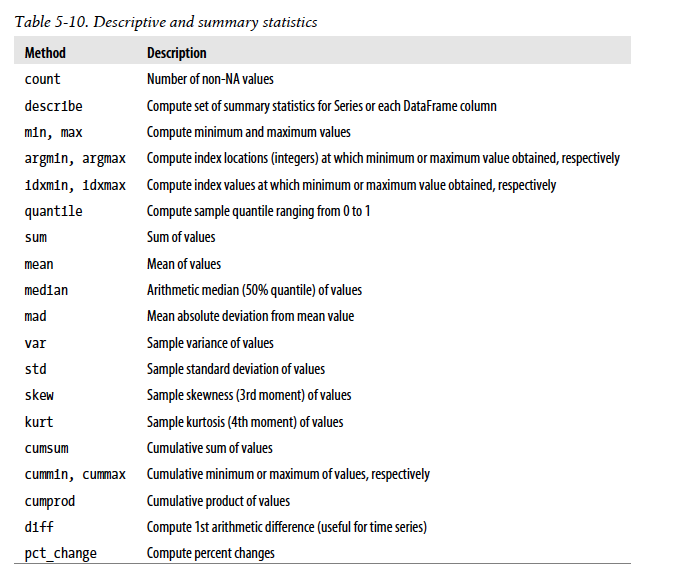

In [15]:
df.rank(axis=1)

,AAPL,MSFT,TSLA,LULU
20201201,1.0,3.0,4.0,2.0
20201202,4.0,3.0,1.0,2.0
20201203,1.0,3.0,2.0,4.0
20201204,1.0,3.0,4.0,2.0


In [16]:
df.cumsum()

,AAPL,MSFT,TSLA,LULU
20201201,-0.010,0.0300,0.05,0.0050
20201202,0.005,0.0350,0.00,0.0025
20201203,-0.020,0.0365,-0.02,0.0125
20201204,-0.050,0.0515,0.01,0.0225


In [17]:
# Describe function
df.describe()

,AAPL,MSFT,TSLA,LULU
count,4.000000,4.000000,4.000000,4.000000
mean,-0.012500,0.012875,0.002500,0.005625
std,0.020207,0.012770,0.045735,0.005907
min,-0.030000,0.001500,-0.050000,-0.002500
25%,-0.026250,0.004125,-0.027500,0.003125
50%,-0.017500,0.010000,0.005000,0.007500
75%,-0.003750,0.018750,0.035000,0.010000
max,0.015000,0.030000,0.050000,0.010000


#### Correlation/Covariance

In [18]:
# Correlation
df.corr()

,AAPL,MSFT,TSLA,LULU
AAPL,1.000000,-0.088811,-0.550041,-0.994808
MSFT,-0.088811,1.000000,0.879688,0.056617
TSLA,-0.550041,0.879688,1.000000,0.516655
LULU,-0.994808,0.056617,0.516655,1.000000


In [19]:
# Covariance
df.cov()

,AAPL,MSFT,TSLA,LULU
AAPL,0.000408,-0.000023,-0.000508,-0.000119
MSFT,-0.000023,0.000163,0.000514,0.000004
TSLA,-0.000508,0.000514,0.002092,0.000140
LULU,-0.000119,0.000004,0.000140,0.000035


In [20]:
mkt_ret = pd.Series([0.01,0.02,0.03,0.04],index=['20201201','20201202','20201203','20201204'])
df.corrwith(mkt_ret)

AAPL   -0.638877
MSFT   -0.490331
TSLA   -0.084684
LULU    0.600994
dtype: float64

In [21]:
np.exp(df)

,AAPL,MSFT,TSLA,LULU
20201201,0.990050,1.030455,1.051271,1.005013
20201202,1.015113,1.005013,0.951229,0.997503
20201203,0.975310,1.001501,0.980199,1.010050
20201204,0.970446,1.015113,1.030455,1.010050


In [22]:
np.exp(df).mean()

AAPL    0.987730
MSFT    1.013020
TSLA    1.003288
LULU    1.005654
dtype: float64